In [1]:
import pandas as pd
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)
import numpy as np

In [2]:
fusionfile = '/home/jiageng/Documents/fhr/data/Fusion Transcripts_MMRF_CoMMpass_IA22_starfusion.tsv'
# subset to first samples
dfstar = pd.read_csv(fusionfile, sep='\t')\
    .assign(PUBLIC_ID=lambda x: x.SAMPLE.apply(lambda x: '_'.join(x.split('_')[:2])))\
    .query('SAMPLE.str.endswith("_CD138pos")')\
    .sort_values('SAMPLE')\
    .groupby(["PUBLIC_ID","FusionName","LeftGene","RightGene"])\
    .head(n=1)

In [3]:
dfstar.shape

(7307, 27)

In [4]:
dfstar.columns

Index(['SAMPLE', 'FusionName', 'JunctionReadCount', 'SpanningFragCount',
       'SpliceType', 'LeftGene', 'LeftBreakpoint', 'RightGene',
       'RightBreakpoint', 'LargeAnchorSupport', 'FFPM', 'LeftBreakDinuc',
       'LeftBreakEntropy', 'RightBreakDinuc', 'RightBreakEntropy', 'annots',
       'CDS_LEFT_ID', 'CDS_LEFT_RANGE', 'CDS_RIGHT_ID', 'CDS_RIGHT_RANGE',
       'PROT_FUSION_TYPE', 'FUSION_MODEL', 'FUSION_CDS', 'FUSION_TRANSL',
       'PFAM_LEFT', 'PFAM_RIGHT', 'PUBLIC_ID'],
      dtype='object')

Gene level info

In [5]:
binmat = dfstar.assign(tmp=1).pivot(index=['PUBLIC_ID','SAMPLE'],columns='FusionName',values='tmp').fillna(0).astype(int).groupby(['PUBLIC_ID']).head(1)
binmat.shape

(798, 3058)

In [6]:
top_fusions = binmat.sum().sort_values(ascending=False)[binmat.sum().sort_values(ascending=False) >= 2].index

In [7]:
top_fusions

Index(['AC005394.1--AC005381.1', 'MAGEC1--AL031073.2', 'OAZ1--KLF2',
       'FOSB--KLF2', 'B2M--IGH@-ext', 'IGH@-ext--NSD2', 'STK25--IGH@-ext',
       'C12orf73--IGL@-ext', 'IGH-@-ext--TXNDC5', 'AC093639.2--AC020584.1',
       ...
       'AC009570.2--IGL@', 'SSR4--IGH@', 'STEAP1--RAPGEF5', 'SP140--ARMC9',
       'CXCR4--KLF2', 'CTHRC1--IGH@-ext', 'EPN1--IGH@-ext', 'ELL--FKBP8',
       'EEF1A1P5--IGH-@-ext', 'TPM4--IGH@'],
      dtype='object', name='FusionName', length=549)

In [8]:
binmat_top = binmat[top_fusions]
binmat_top.shape

(798, 549)

In [9]:
binmat_top

,FusionName,AC005394.1--AC005381.1,MAGEC1--AL031073.2,OAZ1--KLF2,FOSB--KLF2,B2M--IGH@-ext,IGH@-ext--NSD2,STK25--IGH@-ext,C12orf73--IGL@-ext,IGH-@-ext--TXNDC5,AC093639.2--AC020584.1,AC244205.1--IGH@-ext,IGH-@-ext--JCHAIN,LINC02384--MDM1,IGH-@-ext--EEF1A1P5,LINC00944--AC006065.4,IGL-@-ext--HSP90B1,AL162253.2--PLGRKT,FOSB--UBC,IGH@-ext--JCHAIN,TMED3--MINAR1,RGPD5--BCL2L11,IGL-@-ext--RPL8,NSD2--IGH@-ext,AL138963.4--IGH@-ext,IGH@-ext--RPS11,...,RPL7A--IGH@-ext,RPLP1--IGH@-ext,FOSB--EEF1A1,FOSB--PNRC1,FOS--IGH@,AC090771.2--AC091576.1,SOAT2--IGH@-ext,SLC2A11--SMARCB1,SIK1B--IGH@-ext,SH3BGRL3--IGH@-ext,SHISA9--IGH@-ext,SEMA6A-AS1--SEMA6A-AS2,TPT1--IGH@,TPT1--IGH@-ext,AC009226.1--AC007879.3,AC009570.2--IGL@,SSR4--IGH@,STEAP1--RAPGEF5,SP140--ARMC9,CXCR4--KLF2,CTHRC1--IGH@-ext,EPN1--IGH@-ext,ELL--FKBP8,EEF1A1P5--IGH-@-ext,TPM4--IGH@
PUBLIC_ID,SAMPLE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
MMRF_1021,MMRF_1021_1_BM_CD138pos,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
MMRF_1024,MMRF_1024_1_BM_CD138pos,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
MMRF_1029,MMRF_1029_1_BM_CD138pos,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
MMRF_1030,MMRF_1030_1_BM_CD138pos,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
MMRF_1031,MMRF_1031_1_BM_CD138pos,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MMRF_2939,MMRF_2939_1_BM_CD138pos,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
MMRF_2940,MMRF_2940_1_BM_CD138pos,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
MMRF_2941,MMRF_2941_1_BM_CD138pos,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
binmat_top.to_csv('../matrices/gene_fusion_matrix.tsv',sep='\t')

In [11]:
binmat_top.sum().tail(50)

FusionName
PRDM2--KAZN               2
AC140134.1--OCLNP1        2
HNRNPA2B1--EEF1A1P5       2
HERPUD1--NUP93            2
HBB--IGL@-ext             2
VPS54--PELI1              2
WAKMAR2--LINC02539        2
GOLGA3--POLE              2
FUT8--PTBP1P              2
FZD1--IGH@-ext            2
AC109349.1--LINC02472     2
AC138969.2--IGL@-ext      2
AC093484.3--IGL@-ext      2
TRAF3--MARK3              2
RPL13--IGH@-ext           2
RPL13A--IGH@-ext          2
RNF216--ACTB              2
ZFP36--IGH@-ext           2
AC093591.1--IGH-@-ext     2
AC098487.1--SLC39A8       2
AC067930.5--IGLV2-28      2
SEC24A--JADE2             2
RXRA--IGH@-ext            2
RPS3--IGH@-ext            2
RPL4--IGH@-ext            2
RPL7A--IGH@-ext           2
RPLP1--IGH@-ext           2
FOSB--EEF1A1              2
FOSB--PNRC1               2
FOS--IGH@                 2
AC090771.2--AC091576.1    2
SOAT2--IGH@-ext           2
SLC2A11--SMARCB1          2
SIK1B--IGH@-ext           2
SH3BGRL3--IGH@-ext        2
SHISA9--I

In [12]:
dfstar.annots = [eval(x) for x in dfstar.eval('annots')]

In [13]:
dfstar.assign(value=1).pivot(index='SAMPLE',columns='FusionName',values='value').fillna(0)

FusionName,AARS--MRPL4,ABCA3--IGH-@-ext,ABCB8--IGL@-ext,ABCF1--FOXO3B,ABHD2--IGL@-ext,ABHD4--TRAC,AC004009.1--AC007130.1,AC004943.2--AP001107.5,AC005144.1--AC005746.2,AC005258.1--KLF2,AC005291.2--MYHAS,AC005394.1--AC005381.1,AC005410.2--FAM230E,AC005521.1--IGH@-ext,AC005944.1--IGH@-ext,AC005993.1--RGS6,AC006064.4--IGL@-ext,AC006427.2--AC097515.1,AC006453.1--FAM230C,AC007128.2--SLC8A2,AC007362.1--IGL@-ext,AC008014.1--AC079906.1,AC008014.1--AC122685.1,AC008035.1--AC122685.1,AC008063.1--IGH@-ext,...,ZNF337-AS1--TCTN3,ZNF37BP--AC138915.2,ZNF480--CD37,ZNF507--METTL22,ZNF526--MPP1,ZNF559--IGH@-ext,ZNF562--SBNO2,ZNF563--RAB3D,ZNF597--CLUAP1,ZNF609--SLC51B,ZNF624--TSPAN2,ZNF696--IGH@-ext,ZNF740--IGH@,ZNF740--IGH@-ext,ZNF740--IGL@-ext,ZNF75D--CT55,ZNF827--MAP3K14,ZNF83--RNF170,ZNF83--SAMHD1,ZNF84--IGH@-ext,ZNRF3--BID,ZRANB2--SRP68,ZRSR2--FAM230G,ZRSR2--ZNF18,ZSCAN25--IGL@-ext
SAMPLE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
MMRF_1021_1_BM_CD138pos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MMRF_1024_1_BM_CD138pos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MMRF_1024_2_BM_CD138pos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MMRF_1029_1_BM_CD138pos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MMRF_1030_1_BM_CD138pos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MMRF_2939_1_BM_CD138pos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MMRF_2940_1_BM_CD138pos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MMRF_2941_1_BM_CD138pos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
allevents = dfstar.explode('annots')['annots'].value_counts().sort_values(ascending=False)
interevents = allevents[allevents.index.str.contains('INTERCHROMOSOMAL') & ~allevents.index.str.contains('chrY')]
interevents_top = interevents[interevents > 1]

Chromosome level info 

In [15]:
binmat = dfstar.explode('annots')\
    .query('annots in @interevents_top.index')\
    .groupby(['SAMPLE','annots'])\
    .head(1)\
    .assign(tmp=1)\
    .pivot(index='SAMPLE', columns='annots', values='tmp')\
    .fillna(0)\
    .astype(int)\
    [interevents_top.index]
print(binmat.shape)

(837, 228)


In [16]:
binmat.sum()

annots
INTERCHROMOSOMAL[chr14--chr4]     202
INTERCHROMOSOMAL[chr14--chr6]     155
INTERCHROMOSOMAL[chr2--chr14]     162
INTERCHROMOSOMAL[chr15--chr14]    146
INTERCHROMOSOMAL[chr4--chr14]     111
                                 ... 
INTERCHROMOSOMAL[chr6--chr7]        2
INTERCHROMOSOMAL[chr7--chr5]        2
INTERCHROMOSOMAL[chr15--chr9]       2
INTERCHROMOSOMAL[chr19--chr8]       2
INTERCHROMOSOMAL[chr1--chr10]       2
Length: 228, dtype: int64

In [17]:
binmat_top.astype(float)

,FusionName,AC005394.1--AC005381.1,MAGEC1--AL031073.2,OAZ1--KLF2,FOSB--KLF2,B2M--IGH@-ext,IGH@-ext--NSD2,STK25--IGH@-ext,C12orf73--IGL@-ext,IGH-@-ext--TXNDC5,AC093639.2--AC020584.1,AC244205.1--IGH@-ext,IGH-@-ext--JCHAIN,LINC02384--MDM1,IGH-@-ext--EEF1A1P5,LINC00944--AC006065.4,IGL-@-ext--HSP90B1,AL162253.2--PLGRKT,FOSB--UBC,IGH@-ext--JCHAIN,TMED3--MINAR1,RGPD5--BCL2L11,IGL-@-ext--RPL8,NSD2--IGH@-ext,AL138963.4--IGH@-ext,IGH@-ext--RPS11,...,RPL7A--IGH@-ext,RPLP1--IGH@-ext,FOSB--EEF1A1,FOSB--PNRC1,FOS--IGH@,AC090771.2--AC091576.1,SOAT2--IGH@-ext,SLC2A11--SMARCB1,SIK1B--IGH@-ext,SH3BGRL3--IGH@-ext,SHISA9--IGH@-ext,SEMA6A-AS1--SEMA6A-AS2,TPT1--IGH@,TPT1--IGH@-ext,AC009226.1--AC007879.3,AC009570.2--IGL@,SSR4--IGH@,STEAP1--RAPGEF5,SP140--ARMC9,CXCR4--KLF2,CTHRC1--IGH@-ext,EPN1--IGH@-ext,ELL--FKBP8,EEF1A1P5--IGH-@-ext,TPM4--IGH@
PUBLIC_ID,SAMPLE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
MMRF_1021,MMRF_1021_1_BM_CD138pos,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MMRF_1024,MMRF_1024_1_BM_CD138pos,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MMRF_1029,MMRF_1029_1_BM_CD138pos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MMRF_1030,MMRF_1030_1_BM_CD138pos,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MMRF_1031,MMRF_1031_1_BM_CD138pos,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MMRF_2939,MMRF_2939_1_BM_CD138pos,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MMRF_2940,MMRF_2940_1_BM_CD138pos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MMRF_2941,MMRF_2941_1_BM_CD138pos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
import snf

In [39]:
affinity_network = snf.make_affinity(binmat_top.astype(float), metric='hamming', K=350, mu=0.5) # cityblock, hamming, chebyshev give similar results

/home/jiageng/Documents/fhr/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/jiageng/Documents/fhr/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


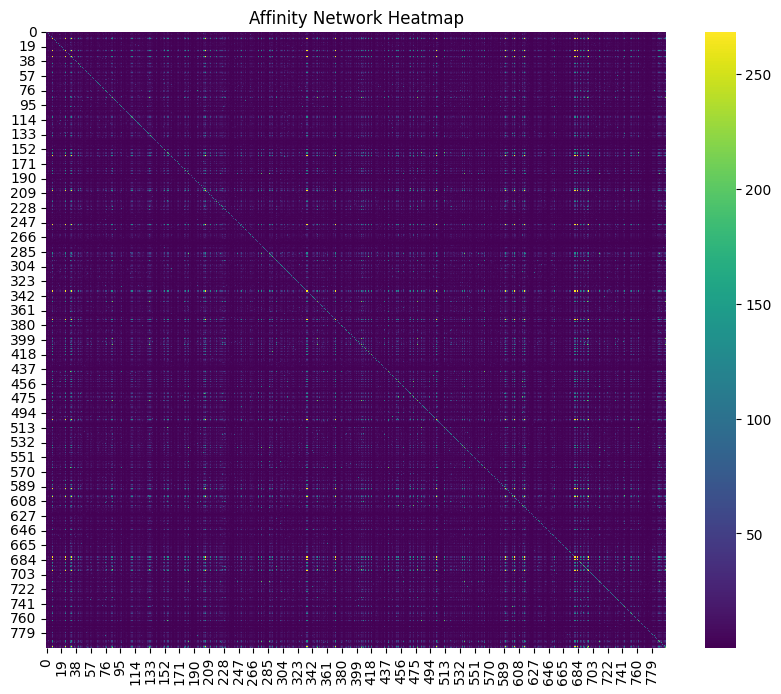

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(affinity_network, cmap='viridis')
plt.title('Affinity Network Heatmap')
plt.show()